## Mengembangkan Algoritma Content-Based Filtering dengan Deep Learning

Pendekatan yang baik untuk mengembangkan algoritma content-based filtering adalah menggunakan **deep learning**. Pendekatan yang dibahas dalam video ini merupakan metode yang banyak digunakan dalam algoritma content-based filtering komersial mutakhir. Mari kita lihat lebih lanjut.

### Proses Dasar

Dalam pendekatan ini, kita memiliki **vektor fitur** yang menggambarkan pengguna, seperti **usia**, **jenis kelamin**, dan **negara**. Kita perlu menghitung vektor **v_u** untuk pengguna. Begitu juga, untuk sebuah film, kita memiliki vektor yang menggambarkan film tersebut seperti **tahun rilis**, **aktor utama**, dan sebagainya, yang akan menghasilkan vektor **v_m**.

Untuk menghitung **v_u** (vektor pengguna), kita menggunakan **neural network**. Neural network pertama yang kita gunakan adalah **user network**, yang menerima daftar fitur pengguna sebagai input seperti usia, jenis kelamin, dan negara, dan melalui beberapa lapisan **dense neural network** akan menghasilkan vektor **v_u**.

Perhatikan bahwa di **output layer**, terdapat **32 unit**, sehingga **v_u** adalah daftar yang terdiri dari 32 angka. Tidak seperti neural network yang kita gunakan sebelumnya, layer terakhir ini tidak hanya memiliki satu unit, tetapi **32 unit**.

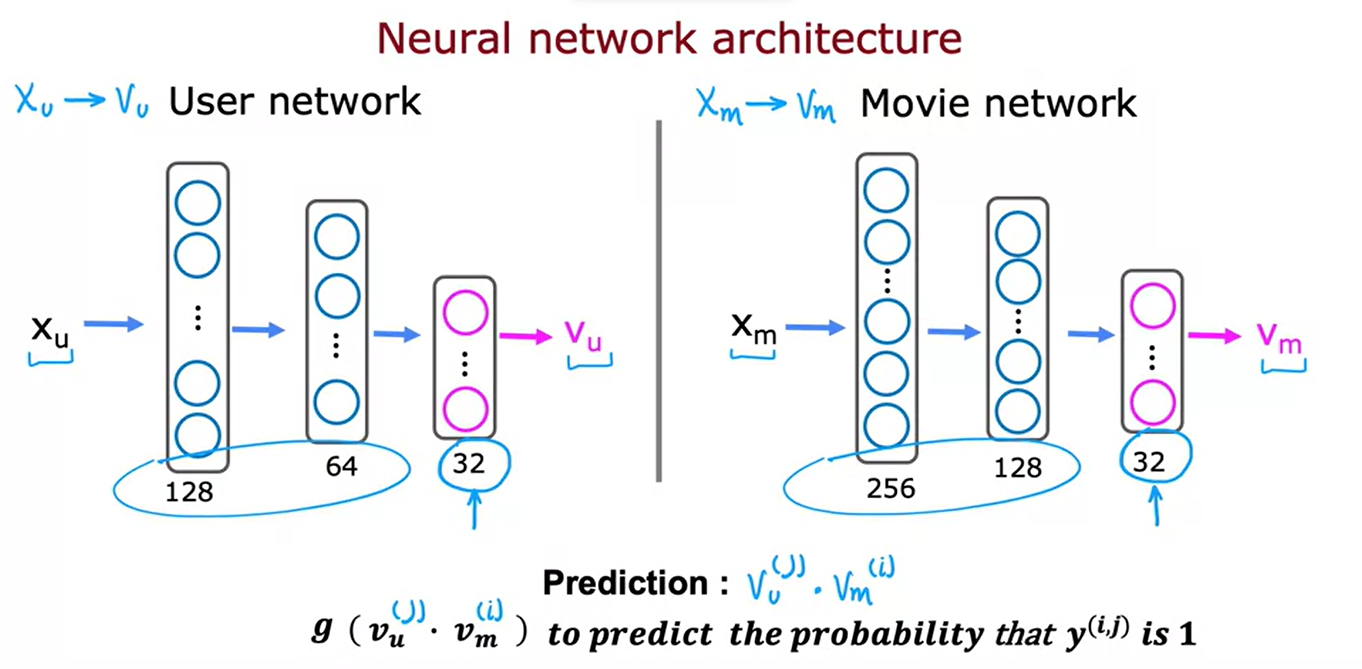

### Proses untuk Film

Untuk menghitung **v_m** (vektor film), kita dapat menggunakan **movie network**. Network ini menerima input berupa fitur film dan, melalui beberapa lapisan neural network, menghasilkan **v_m**.

Akhirnya, kita dapat memprediksi rating dari seorang pengguna pada film tersebut dengan menggunakan **dot product** antara **v_u** dan **v_m**.

### Arsitektur Jaringan

Jaringan pengguna dan jaringan film bisa memiliki jumlah lapisan tersembunyi yang berbeda, dengan jumlah unit per lapisan yang juga berbeda. Namun, output layer dari keduanya harus memiliki ukuran yang sama.

Jika kita memprediksi rating bintang film dari skala 1-5 atau 0-5, maka algoritma akan memprediksi nilai ini. Namun, jika kita menggunakan label biner, misalnya jika pengguna menyukai atau tidak menyukai film, kita dapat menggunakan **sigmoid function** pada hasil **v_u.v_m** untuk memprediksi probabilitas bahwa pengguna akan menyukai film tersebut.

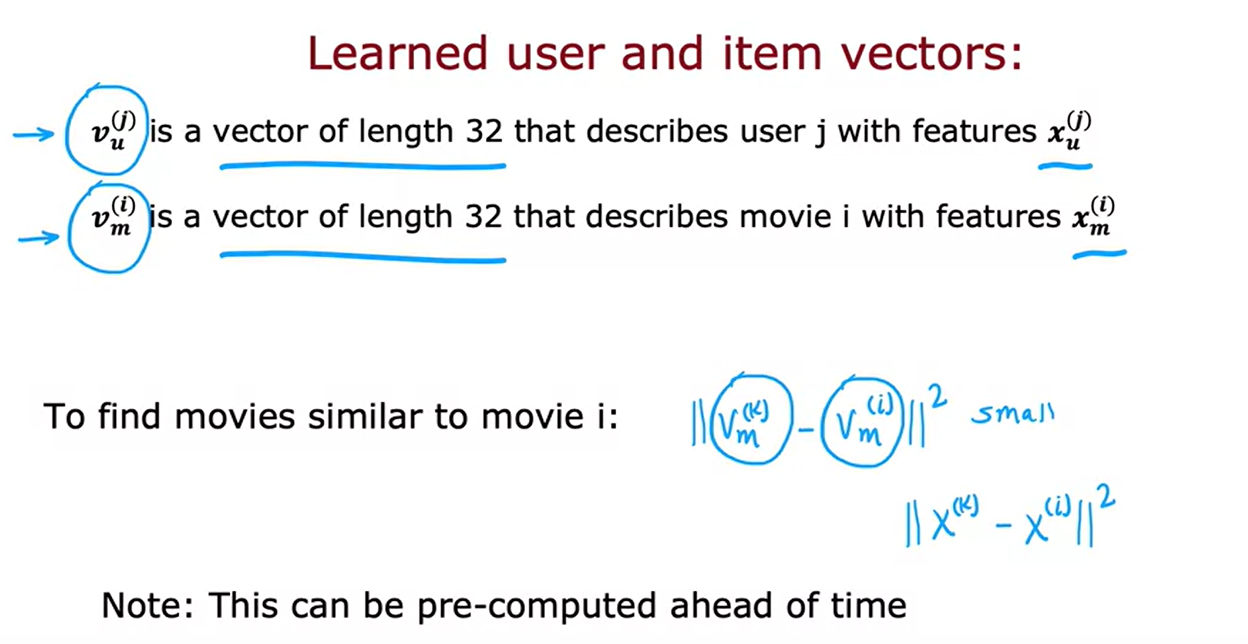

### Pelatihan Jaringan Neural

Untuk melatih semua parameter dari **user network** dan **movie network**, kita membangun sebuah **cost function (J)** yang mirip dengan cost function pada **collaborative filtering**. Dengan asumsi kita memiliki beberapa data mengenai rating yang diberikan pengguna terhadap film, kita dapat menjumlahkan seluruh pasangan **i** dan **j** dari perbedaan antara prediksi (yaitu **v_u^j** dot product **v_m^i**) dan rating aktual **y_ij**, kemudian menghitung kuadrat perbedaannya.

Cara melatih model ini adalah dengan menggunakan **gradient descent** atau algoritma optimasi lainnya untuk meminimalkan nilai **cost function J**.

Jika kita ingin menambahkan **regularisasi**, kita juga bisa menambahkan regularisasi neural network biasa untuk menjaga nilai parameter jaringan agar tetap kecil.

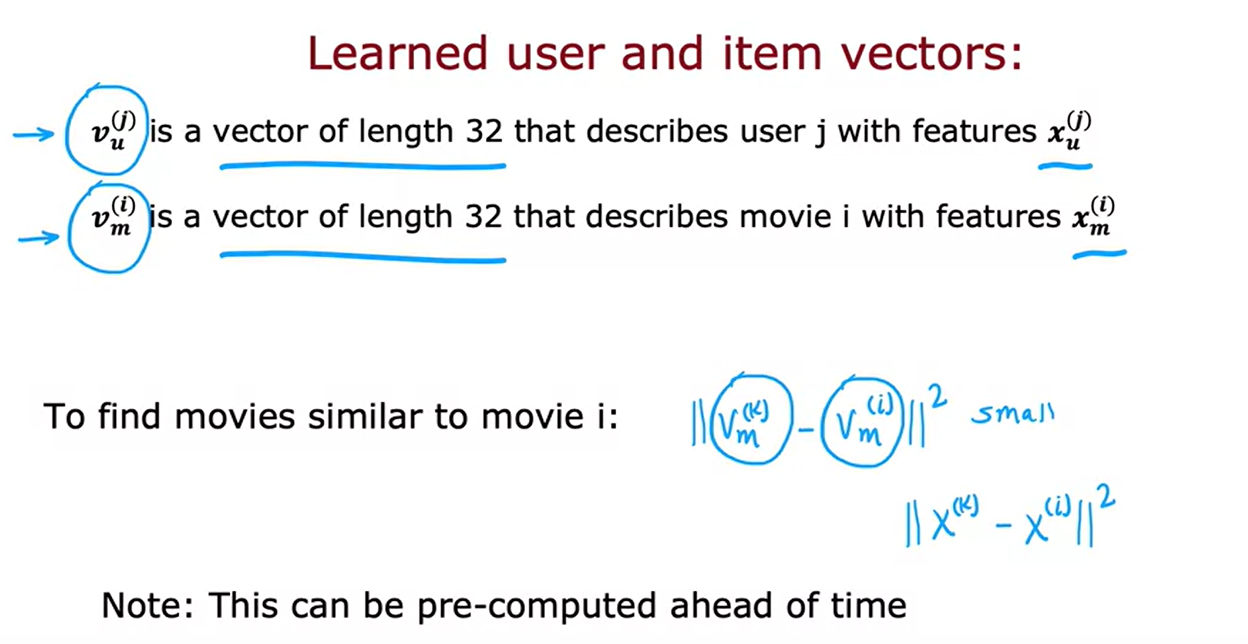

### Mencari Item Serupa

Setelah melatih model, kita juga bisa menggunakannya untuk menemukan item yang mirip, mirip dengan pendekatan pada **collaborative filtering**.

Jika kita memiliki vektor **v_m** yang menggambarkan film **i**, dan kita ingin menemukan film lain yang mirip, kita bisa mencari film **k** di mana jarak kuadrat antara vektor yang menggambarkan film **k** dan vektor yang menggambarkan film **i** kecil.

Hal ini memungkinkan kita untuk menemukan item yang mirip dengan item tertentu. Menariknya, pencarian ini bisa dilakukan **pre-compute**—dihitung terlebih dahulu—sehingga, ketika pengguna melihat film di situs, kita bisa langsung menampilkan 10 atau 20 film yang paling mirip dengan film tersebut.

### Catatan Praktis

Salah satu keuntungan menggunakan neural network adalah kemampuannya untuk menggabungkan beberapa jaringan neural menjadi satu sistem yang lebih besar dan lebih kuat, seperti pada contoh ini di mana kita menggabungkan **user network** dan **movie network**.

Namun, dalam praktiknya, pengembang sering menghabiskan banyak waktu untuk merancang fitur yang tepat untuk dimasukkan ke dalam algoritma ini. Jadi, jika kita membangun sistem seperti ini secara komersial, menghabiskan waktu untuk merancang fitur yang baik adalah hal yang perlu dipertimbangkan.

Salah satu keterbatasan dari algoritma ini adalah kebutuhan komputasi yang sangat besar jika kita memiliki katalog item yang sangat banyak, seperti film. Pada video selanjutnya, kita akan membahas cara memodifikasi algoritma ini agar dapat bekerja pada katalog item yang besar.
